# ARP - Lecture 2

January 25, 2018

## Objectives

- Students will understand the basic workflow of NJOY
- Students will understand the basics of cross-section reconstruction using NJOY
- Students will understand the basics of resonances and the impact of temperature of those resonances

## Readings

- NJOY User Manual, Chapters 1--5
- Reuss, Sections 2.7 and 8.5 (on resonances and the Doppler effect)

## Breit-Wigner

Resonance capture cross section:

$$
  \sigma_{\gamma}(E) = \sigma_0 \frac{\Gamma_{\gamma}}{\Gamma} \left (\frac{E_0}{E} \right )^{1/2} \frac{1}{1+y^2} \, ,
$$

where $y = \frac{2}{\gamma} (E-E_0)$, $\sigma_0 = 2 \lambda \frac{\Gamma_n}{\Gamma} g$, and $g = (2J+1)/(2(2I+1))$.

### Selected Resonance Parameters of U-238

(From BNL.  Use Sigma and click on resonance parameters link.)

```
           E          J         GN         GG        GFA        GFB
  ---------- ---------- ---------- ---------- ---------- ----------
  6.673491+0 5.000000-1 1.475792-3 2.300000-2 0.000000+0 9.990000-9
  2.087152+1 5.000000-1 1.009376-2 2.286379-2 5.420000-8 0.000000+0
  3.668212+1 5.000000-1 3.354568-2 2.300225-2 0.000000+0 9.770000-9
```

Where $E$ is resonance energy (eV), $J$ is statistical spin factor

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# potential cross section (in barns)
sigma_p = 11.2934
I = 0 # s wave
E0, J, GN, GG, _, _ = np.loadtxt('u238.txt', unpack=True)
G = GN+GG
A = 238.0
E = np.logspace(-1, 3, 10000)
sigma_g = np.zeros_like(E)
sigma_n = np.zeros_like(E)
sigma_n[:] = sigma_p

for i in range(len(E0)):
    # statistical spin factor, where I=nuclear spint, J=total spin
    g = (2*J[i]+1)/(2*(2*I+1))
    
    # total cross section at resonance energy (DH 2-36)
    sigma_0 = 2.608e6 * (A+1)**2/(A**2 * E0[i]) * (GN[i]/G[i]) * g
     
    # capture cross section (DH 2-35)
    y = (2/G[i])*(E - E0[i])
    sigma_g += sigma_0 * (GN[i]/G[i]) * np.sqrt(E0[i]/E) * (1/(1+y**2))

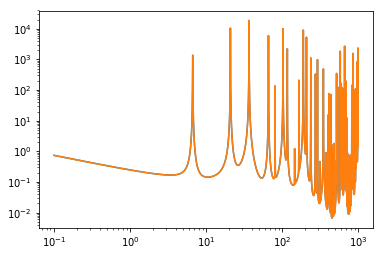

In [3]:
plt.loglog(E, sigma_g) 
plt.show()

## Exploring NJOY



```
moder  / Convert data on 20 to binary to 21, id is 9237
20 -21
reconr / Reconstruct cross sections onto 22
-21 -22
'PENDF TAPE FOR U-238'/
9237 0/
0.001  0.  0.005/ Reconstruction 0.1% (0.5% max) with 0K temp
0 /
stop
```